In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

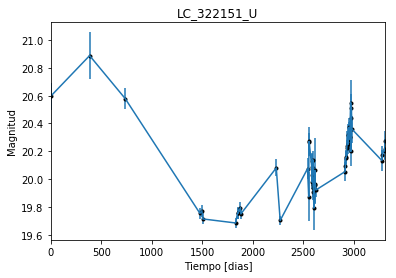

In [2]:
data = np.genfromtxt('LC_322151_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_322151_U')
plt.savefig("LC_322151_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

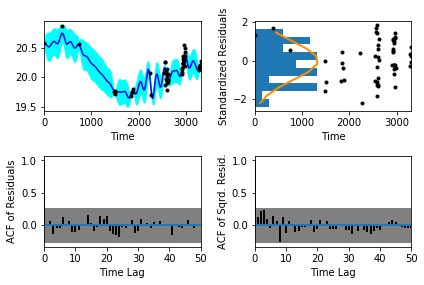

In [5]:
sample.assess_fit()

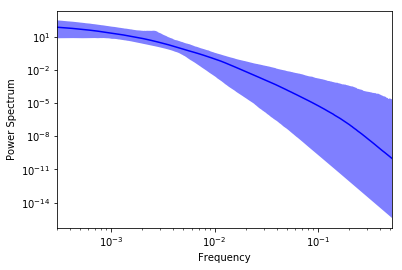

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

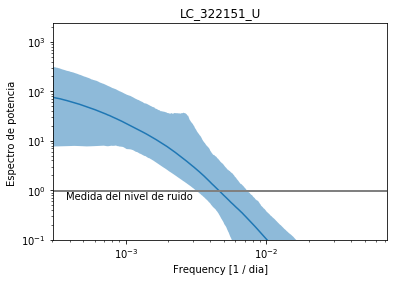

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_322151_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_322151_U')

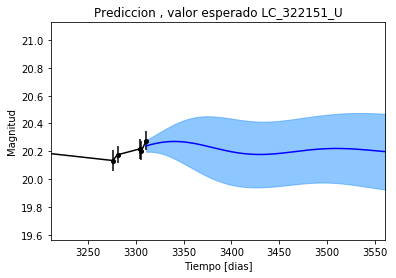

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_322151_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_322151_U')

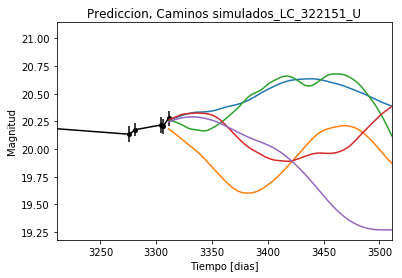

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_322151_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


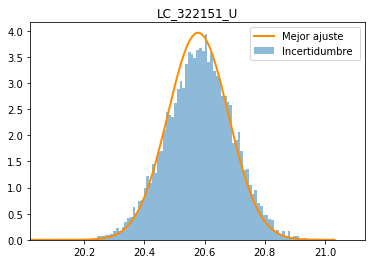

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_322151_U')
plt.savefig("Mejor_ajuste_LC_322151_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_322151_U')

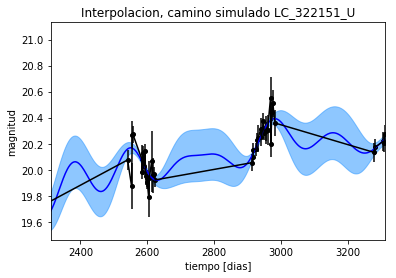

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_U')

Text(0.5,1,'Interpolacion, camino simulado LC_322151_U')

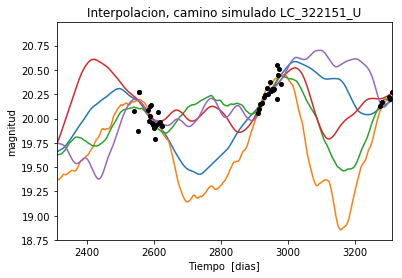

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 543.547433046
Median: 0.0177660673549
Standard deviation: 0.197502153435
68% credibility interval: [ 0.00134326  0.21539069]
95% credibility interval: [  4.12714132e-04   7.58263089e-01]
99% credibility interval: [  3.30809928e-04   9.68465264e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 626.28501445
Median: 0.00420492287096
Standard deviation: 0.0916740198062
68% credibility interval: [ 0.00057589  0.04372896]
95% credibility interval: [ 0.00032911  0.296616  ]
99% credibility interval: [  3.06027250e-04   6.68172443e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 550.952326252
Median: 0.0271180585054
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1241.56878996
Median: 59.4847603185
Standard deviation: 1.67162095932
68% credibility interval: [ 57.64908831  60.65583428]
95% credibility interval: [ 54.91789882  61.34725746]
99% credibility interval: [ 52.79913171  61.9110753 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 457.259283477
Median: 0.904523875991
Standard deviation: 2.32313444628
68% credibility interval: [ 0.1019581   4.16420952]
95% credibility interval: [ 0.02583512  8.23980576]
99% credibility interval: [  0.01395602  10.94734492]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 456.505861868
Median: 0.741172868027
Standard deviation: 9.69512552951
68% credibility interval: [  0.04299248  11.67817387]
95% credibility interval: [  3.0407884

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3898.01047289
Median: 3.05217323027e-38
Standard deviation: 1.9012075913e+50
68% credibility interval: [  1.05709353e-60   3.04237477e-12]
95% credibility interval: [  1.82251634e-90   2.24100555e-01]
99% credibility interval: [  3.03764339e-123   9.60763943e+000]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2807.89850191
Median: 20.1974299326
Standard deviation: 0.205075971578
68% credibility interval: [ 20.01799795  20.38201585]
95% credibility interval: [ 19.81598178  20.62321412]
99% credibility interval: [ 19.64369602  20.86717745]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 423.361489714
Median: 0.0100374852248
Standard deviation: 0.260098124237
68% credibility interval: [ 0.          0.43870639]
95% credibility interval: [ 0.          0.88890958]
99% credibility interval: [ 0.          1.01716301]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 423.361489714
Median: 0.0100374852248
Standard deviation: 0.260098124237
68% credibility interval: [ 0.          0.43870639]
95% credibility interval: [ 0.          0.88890958]
99% credibility interval: [ 0.          1.01716301]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1047.64710621
Median: 0.0
Standard deviation: 0.00058781728041
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1241.56878996
Median: 59.4847603185
Standard deviation: 1.67162095932
68% credibility interval: [ 57.64908831  60.65583428]
95% credibility interval: [ 54.91789882  61.34725746]
99% credibility interval: [ 52.79913171  61.9110753 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1073.9798178
Median: 0.173716175013
Standard deviation: 0.165606727
68% credibility interval: [ 0.10659264  0.30605128]
95% credibility interval: [ 0.07023735  0.57727865]
99% credibility interval: [ 0.05379514  0.98737591]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2607.50229097
Median: 0.988480129195
Standard deviation: 0.163861044435
68% credibility interval: [ 0.84648195  1.16426204]
95% credibility interval: [ 0.73523895  1.37193673]
99% credibility interval: [ 0.67077981  1.52504606]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 481.552094275
Median: 0.001258294186
Standard deviation: 0.335849815606
68% credibility interval: [  4.36218866e-05   2.83381036e-02]
95% credibility interval: [  1.85972850e-06   6.17586449e-01]
99% credibility interval: [  2.50160693e-07   1.97980708e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 543.547433046
Median: (-0.11162749337-0.0327728215507j)
Standard deviation: 2.05199765795
68% credibility interval: [-1.35333961-1.09633503j -0.00843996-0.02036136j]
95% credibility interval: [ -4.76430750e+00+0.j          -2.59315937e-03-5.98462136j]
99% credibility interval: [ -6.08504672e+00+0.j          -2.07854008e-03-0.21711669j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 626.28501445
Median: (-0.0264203096007+1.81315395317j)
Standard deviation: 1.73278312923
68% credibility interval: [-0.27475716+1.53114815j -0.00361839+0.j        ]
95% credibility interval: [-1.86369328+5.2926559j -0.00206788+0.j       ]
99% credibility interval: [ -4.19825128e+00+3.62842041j  -1.92282592e-03+0.j        ]
Posterior summary